In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score



2023-02-04 15:30:47.857021: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/bikash/Desktop/keras/tensorflow/lib/python3.10/site-packages/cv2/../../lib64:
2023-02-04 15:30:47.857036: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#Loading mnist datset from keras
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()


In [3]:
# data=pd.DataFrame(y_train)
# data.to_excel("target.xlsx")


5


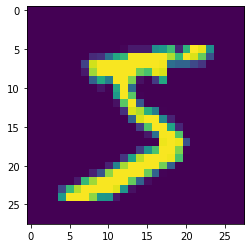

In [4]:
print(y_train[0])
plt.imshow(x_train[0])

Pre-processing

In [5]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
IMG_SIZE=28
x_train=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1) 
x_test=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1) 

In [6]:


print("Training data dimension: ", x_train.shape)
print("Testing data dimension: ", x_test.shape)

Training data dimension:  (60000, 28, 28, 1)
Testing data dimension:  (10000, 28, 28, 1)


In [7]:
print(np.unique(y_test, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))


Building CNN model

In [8]:
#creating a neural network
model=Sequential()

#First Convolution Layer
model.add(Conv2D(64, (5,5), input_shape=x_train.shape[1:])) #only for first convolution layer to mention input size
model.add(Activation("relu")) #activation function to make it non-linera, <0, remove, >0
model.add(MaxPooling2D(pool_size=(2,2))) #Maxpooling single maximum value of 2x2


#2nd Convolution Layer
model.add(Conv2D(64, (5,5))) 
model.add(Activation("relu")) 
model.add(MaxPooling2D(pool_size=(2,2)))


#Fully Connected Layer 1
model.add(Flatten())#before using fully connected layer, need to be flatten so that 2D to 1D
model.add(Dense(64))
model.add(Activation("relu"))  


#fully connected Layer 2
model.add(Dense(10))
model.add(Activation("softmax"))


2023-02-04 15:31:01.346934: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-02-04 15:31:01.346974: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hp): /proc/driver/nvidia/version does not exist
2023-02-04 15:31:01.347763: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 64)        1664      
                                                                 
 activation (Activation)     (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          102464    
                                                                 
 activation_1 (Activation)   (None, 8, 8, 64)          0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                    

In [10]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [11]:
score=model.fit(x_train,y_train,epochs=20, validation_split=0.3)

Epoch 1/20
1313/1313 [==============================] - 20s 15ms/step - loss: 0.1813 - accuracy: 0.9457 - val_loss: 0.0736 - val_accuracy: 0.9779
Epoch 2/20
1313/1313 [==============================] - 20s 15ms/step - loss: 0.0536 - accuracy: 0.9834 - val_loss: 0.0531 - val_accuracy: 0.9836
Epoch 3/20
1313/1313 [==============================] - 21s 16ms/step - loss: 0.0379 - accuracy: 0.9878 - val_loss: 0.0485 - val_accuracy: 0.9853
Epoch 4/20
1313/1313 [==============================] - 21s 16ms/step - loss: 0.0273 - accuracy: 0.9910 - val_loss: 0.0514 - val_accuracy: 0.9855
Epoch 5/20
1313/1313 [==============================] - 21s 16ms/step - loss: 0.0202 - accuracy: 0.9935 - val_loss: 0.0441 - val_accuracy: 0.9878
Epoch 6/20
1313/1313 [==============================] - 21s 16ms/step - loss: 0.0159 - accuracy: 0.9948 - val_loss: 0.0566 - val_accuracy: 0.9849
Epoch 7/20
1313/1313 [==============================] - 21s 16ms/step - loss: 0.0143 - accuracy: 0.9948 - val_loss: 0.0403 -

In [12]:
model.save("/home/bikash/Desktop/keras/BroadWAyProject/handdigit.h5")

In [13]:
prediction=model.predict([x_train])

  29/1875 [..............................] - ETA: 6s

2023-02-04 15:38:49.454239: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 7s 4ms/step


In [14]:
train_pred=[]
for i in range(0,len(prediction)):
  t=np.argmax(prediction[i])
  train_pred.append(t)


Accuray:  99.32
Precision:  99.32
Recall:  99.32
F1 Score:  99.31


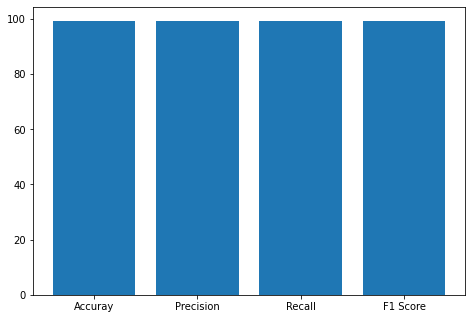

In [15]:
acc=round(accuracy_score(y_train,train_pred),4)*100
pre=round(precision_score(y_train,train_pred, average='macro'),4)*100
rec=round(precision_score(y_train,train_pred,average='macro'),4)*100
f1=round(f1_score(y_train,train_pred,average='macro'),4)*100

print("Accuray: ",acc)
print("Precision: ",pre)
print("Recall: ",rec)
print("F1 Score: ",f1)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Performance = ['Accuray', 'Precision', 'Recall', 'F1 Score']
data = [acc, pre, rec, f1]
ax.bar(Performance,data)
plt.show()


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

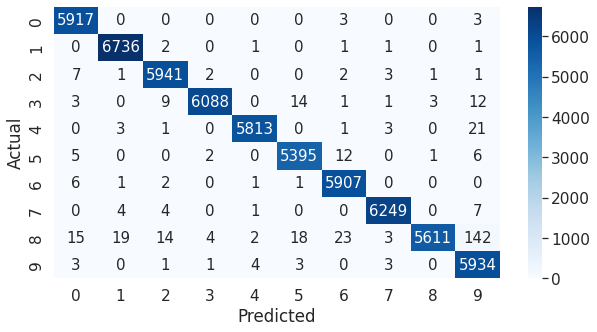

In [16]:
con_max=confusion_matrix(y_train,train_pred)
label=["0","1","2","3","4","5","6","7","8","9"]
df_cm=pd.DataFrame(con_max,columns=np.unique(y_train),index=np.unique(y_train))
df_cm.index.name="Actual"
df_cm.columns.name="Predicted"
plt.figure(figsize=(10,5))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size":15},fmt="d")

**Testing Model**

In [17]:
test_prediction=model.predict([x_test])

313/313 [==============================] - 1s 4ms/step


In [18]:
test_pred=[]
for i in range(0,len(test_prediction)):
  t=np.argmax(test_prediction[i])
  test_pred.append(t)

Accuray:  98.97
Precision:  98.97
Recall:  98.97
F1 Score:  98.96000000000001


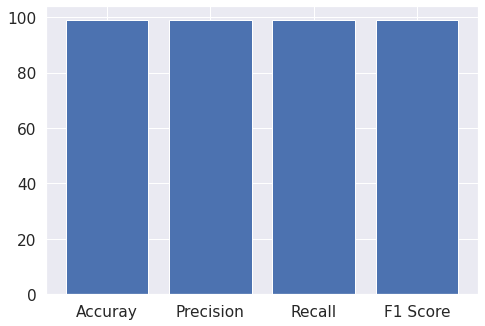

In [19]:
acc=round(accuracy_score(y_test,test_pred),4)*100
pre=round(precision_score(y_test,test_pred, average='macro'),4)*100
rec=round(precision_score(y_test,test_pred,average='macro'),4)*100
f1=round(f1_score(y_test,test_pred,average='macro'),4)*100

print("Accuray: ",acc)
print("Precision: ",pre)
print("Recall: ",rec)
print("F1 Score: ",f1)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Performance = ['Accuray', 'Precision', 'Recall', 'F1 Score']
data = [acc, pre, rec, f1]
ax.bar(Performance,data)
plt.show()


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

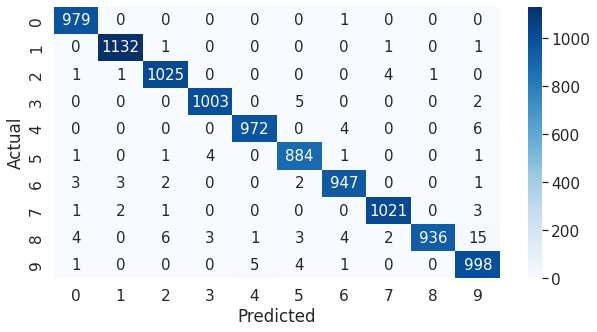

In [20]:
con_mx=confusion_matrix(y_test,test_pred)

label=["0","1","2","3","4","5","6","7","8","9"]
df_cm=pd.DataFrame(con_mx,columns=np.unique(y_test),index=np.unique(y_test))
df_cm.index.name="Actual"
df_cm.columns.name="Predicted"
plt.figure(figsize=(10,5))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size":15},fmt="d")

**Recognition System**

1/1 [==============================] - 0s 53ms/step
[[4.7031802e-11 1.0000000e+00 1.1894310e-19 5.6648726e-28 3.9621422e-12
  8.1091467e-19 3.1002507e-19 2.7834710e-19 1.1934604e-15 1.6914504e-20]]
The number is  1


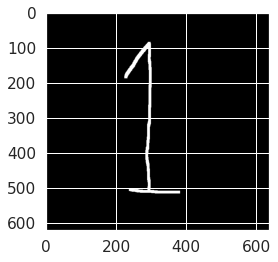

In [32]:
import tensorflow
import keras
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img,img_to_array

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img
modelP = keras.models.load_model('/home/bikash/Desktop/keras/BroadWAyProject/handdigit.h5')
img1=cv2.imread("/home/bikash/Desktop/keras/BroadWAyProject/1.png")

gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
input=tf.keras.utils.normalize(resized, axis=1)#normalize
input=np.array(input).reshape(-1,IMG_SIZE,IMG_SIZE,1)#increase one dimension for kernel 
result=modelP.predict(input)
print(result)
res=np.argmax(result)
testImage = img1
# print(res)
# displaying the modified image
plt.imshow(testImage)

print("The number is ",res)

In [22]:
score.history

{'loss': [0.18134726583957672,
  0.053618866950273514,
  0.03786645829677582,
  0.02734251134097576,
  0.02019606903195381,
  0.015901658684015274,
  0.014260999858379364,
  0.010098423808813095,
  0.010838194750249386,
  0.006511237937957048,
  0.0072729988023638725,
  0.007497275713831186,
  0.007103471085429192,
  0.005598527379333973,
  0.005609380081295967,
  0.0037528006359934807,
  0.006679433397948742,
  0.003978917375206947,
  0.00548719335347414,
  0.004606347996741533],
 'accuracy': [0.9457380771636963,
  0.9833809733390808,
  0.9878333210945129,
  0.9910476207733154,
  0.9935238361358643,
  0.9948095083236694,
  0.994785726070404,
  0.9963809251785278,
  0.9961428642272949,
  0.9976904988288879,
  0.9975476264953613,
  0.9976190328598022,
  0.9973095059394836,
  0.9981666803359985,
  0.9981666803359985,
  0.9987857341766357,
  0.9978095293045044,
  0.9985238313674927,
  0.998452365398407,
  0.9985476136207581],
 'val_loss': [0.07358226925134659,
  0.05314595252275467,
  0.0

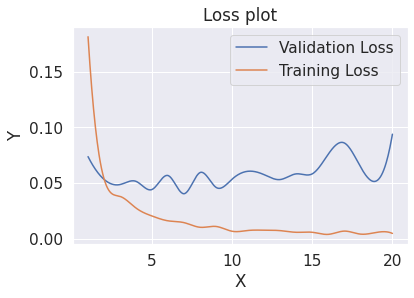

In [23]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt 
history_dict = score.history
loss_values = history_dict['loss']
n = len(loss_values)
epochs = range(1, len(loss_values) + 1)
y=history_dict['loss']
y1=history_dict['val_loss']

model = make_interp_spline(epochs, y)
model1 = make_interp_spline(epochs, y1)
xs=np.linspace(1,n,500)
ys=model(xs)
ys1 = model1(xs)

plt.xlabel('Epochs') 
plt.plot(xs, ys1, label='Validation Loss')
plt.plot(xs, ys,label='Training Loss')
plt.title("Loss plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

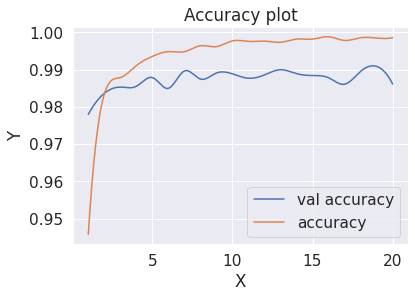

In [24]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt 
history_dict = score.history
loss_values = history_dict['loss']
n = len(loss_values)
epochs = range(1, len(loss_values) + 1)
y=history_dict['accuracy']
y1=history_dict['val_accuracy']

model=make_interp_spline(epochs, y)
model1=make_interp_spline(epochs, y1)
xs=np.linspace(1,n,500)
ys=model(xs)
ys1 = model1(xs)
plt.xlabel('Epochs') 
plt.plot(xs, ys1, label='val accuracy')
plt.plot(xs, ys,label='accuracy')
plt.title("Accuracy plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()